# Machine Learning in Ocean Remote Sensing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [183]:
cb_palette = ['#006BA4', '#FF800E', '#ABABAB']

In [195]:
plt.rcParams.update({'font.size': 16})

## Figure 1

random forest for predicting chla concentration at depth based on surface chla, temp, and depth

A nice simple example here would be to have three profiles with depth and a certain temperature, 
and to have it predict missing pieces when they are just split randomly (i.e. interpolation) and 
when it hasn’t seen a certain type of profile and see how well it is able to predict. Do this with 
a simple neural network.

make three profiles of chla, one just decreasing with depth, one with a DCM and one constant to the bottom each with a different temperature and have the intermediate temperature be the one predicted on

In [146]:
depths = np.linspace(0,19,20)

In [147]:
depths

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [90]:
dcm_temp = 20

dcm_x = np.linspace(0,1.4*math.pi,10)
dcm_y = np.sin(dcm_x)
dcm_chlas = np.ones(len(depths))

dcm_chlas[10:]= dcm_chlas[10:] + dcm_y

In [285]:
decreasing_temp = 10

N=20
a=1
b=.15
decreasing_chlas = a * (1-b) ** np.arange(N)

In [95]:
constant_temp = 15
constant_chlas = np.ones(len(depths))

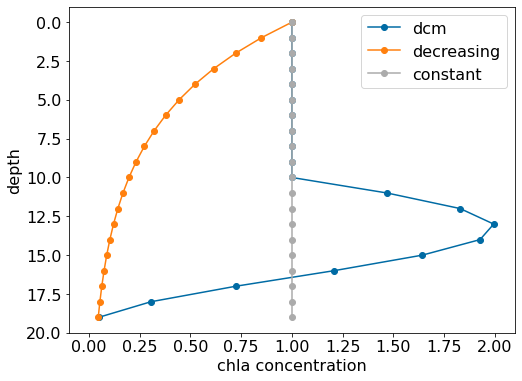

In [284]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dcm_chlas,depths,marker='o',c=cb_palette[0],label='dcm')
ax.plot(decreasing_chlas, depths,marker='o',c=cb_palette[1],label='decreasing')
ax.plot(constant_chlas, depths,marker='o',c=cb_palette[2],label='constant')
ax.legend()
ax.set_ylim(20,-1)
ax.set_xlim(-0.1,2.1)
ax.set_ylabel('depth')
ax.set_xlabel('chla concentration')
plt.show()

format for sklearn

In [286]:
dcm_X = [[dcm_temp, i] for i in depths]
decreasing_X = [[decreasing_temp, i] for i in depths]
constant_X = [[constant_temp, i] for i in depths]

X = np.vstack([dcm_X,decreasing_X])

y = np.concatenate([dcm_chlas,decreasing_chlas])

train the model

In [287]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

apply it on one of the known cases

In [288]:
test_depths = np.linspace(0,19,50)

test_X_dcm = np.array([[dcm_temp, i] for i in test_depths])
test_X_decreasing = np.array([[decreasing_temp, i] for i in test_depths])
test_X_constant = np.array([[constant_temp, i] for i in test_depths])

In [289]:
test_y_dcm = rf.predict(test_X_dcm)
test_y_decreasing = rf.predict(test_X_decreasing)
test_y_constant = rf.predict(test_X_constant)

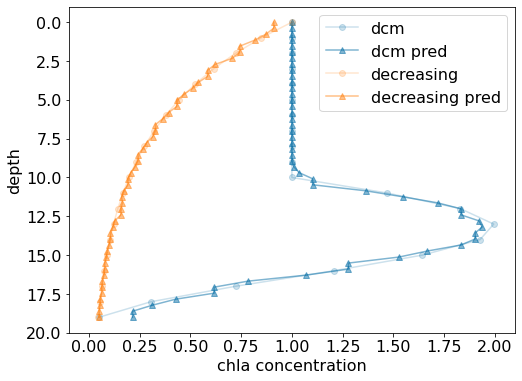

In [290]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dcm_chlas, depths,marker='o',c=cb_palette[0],alpha=0.2,label='dcm')
ax.plot(test_y_dcm, test_depths,marker='^',c=cb_palette[0],alpha=0.5,label='dcm pred')

ax.plot(decreasing_chlas, depths,marker='o',c=cb_palette[1],alpha=0.2,label='decreasing')
ax.plot(test_y_decreasing, test_depths,marker='^',c=cb_palette[1],alpha=0.5,label='decreasing pred')


ax.legend()
ax.set_ylim(20,-1)
ax.set_xlim(-0.1,2.1)
ax.set_ylabel('depth')
ax.set_xlabel('chla concentration')
plt.show()

## putting it all together

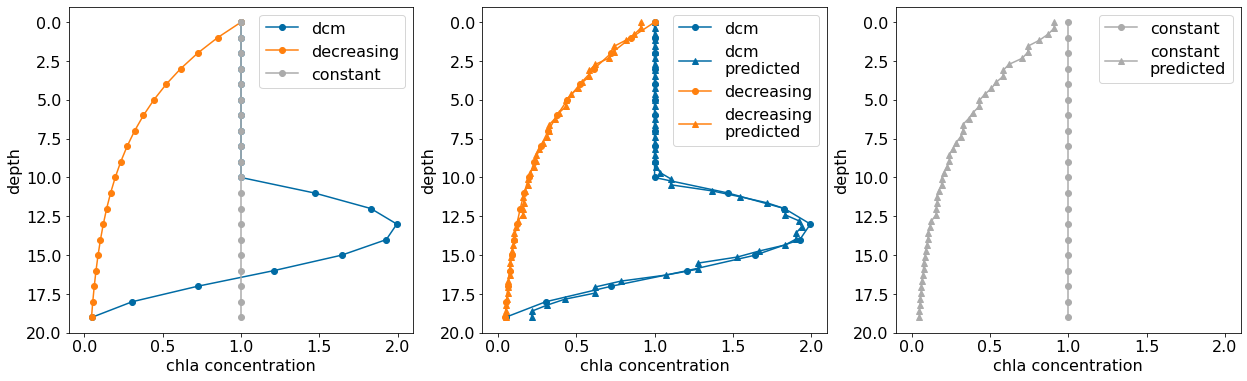

In [291]:
fig, ax = plt.subplots(1,3,figsize=(7*3,6))
ax[0].plot(dcm_chlas,depths,marker='o',c=cb_palette[0],label='dcm')
ax[0].plot(decreasing_chlas, depths,marker='o',c=cb_palette[1],label='decreasing')
ax[0].plot(constant_chlas, depths,marker='o',c=cb_palette[2],label='constant')

ax[1].plot(dcm_chlas, depths,marker='o',c=cb_palette[0],alpha=1,label='dcm')
ax[1].plot(test_y_dcm, test_depths,marker='^',c=cb_palette[0],alpha=1,label='dcm\npredicted')

ax[1].plot(decreasing_chlas, depths,marker='o',c=cb_palette[1],alpha=1,label='decreasing')
ax[1].plot(test_y_decreasing, test_depths,marker='^',c=cb_palette[1],alpha=1,label='decreasing\npredicted')

ax[2].plot(constant_chlas, depths,marker='o',c=cb_palette[2],alpha=1,label='constant')
ax[2].plot(test_y_constant, test_depths,marker='^',c=cb_palette[2],alpha=1,label='constant\npredicted')

for a in fig.get_axes():
    a.legend()
    a.set_ylim(20,-1)
    a.set_xlim(-0.1,2.1)
    a.set_ylabel('depth')
    a.set_xlabel('chla concentration')
    
plt.savefig('figs/example_of_generalizability.png',dpi=300)
plt.show()